Total unique products: 19782
Total categories: 10

Top 10 Categories by Product Count:
category
Pantry                  7041
Health & Beauty         4606
Household               2786
Dairy, Eggs & Fridge    1751
Drinks                  1573
Frozen                  1102
Bakery                   582
Fruit & Vegetables       505
Meat & Seafood           420
Deli                     242
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


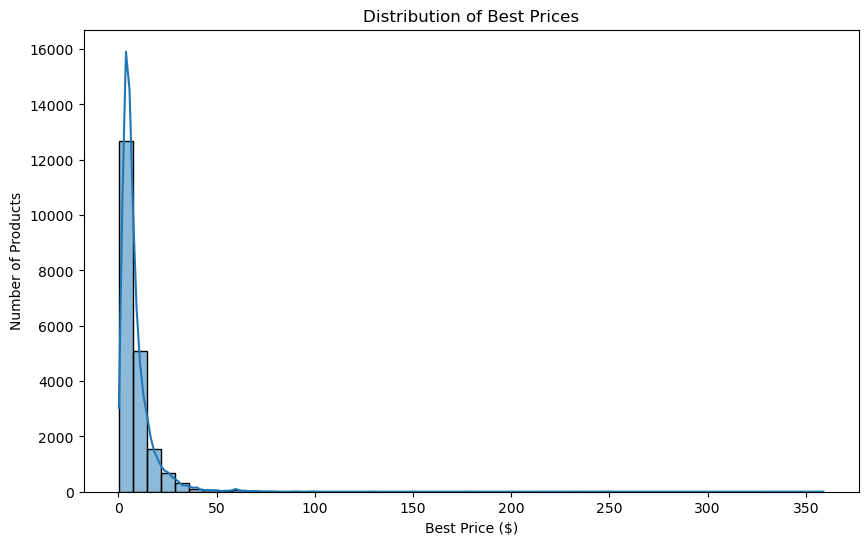


Top 10 Most Expensive Products:
                                               item_name  best_price
16001  Apple iPhone XR 64GB Premium Refurbished ... 1...       359.0
16000  Apple iPhone SE 64GB Premium Refurbished ... 1...       260.0
15999                      Optus OPPO A58 Black | 1 each       249.0
15998                       Telstra Vivo Y55 5G | 1 each       249.0
15997                    Telstra Oppo A16S 64Gb | 1 each       249.0
15533               Telstra Samsung Galaxy A05s | 1 each       229.0
15996                       Telstra Oppo A38 4G | 1 each       199.0
19590  Oral B Io 3 Matte Black +1 Ultimate Clean Elec...       199.0
15994                           Optus Oppo A16S | 1 each       179.0
15995                     Optus Samsung A04S 4G | 1 each       179.0

Top 10 Cheapest Products:
                                               item_name  best_price
13239       Coles Online 100% Recycle Paper Bag | 1 each        0.25
717                        Coles Okra loose

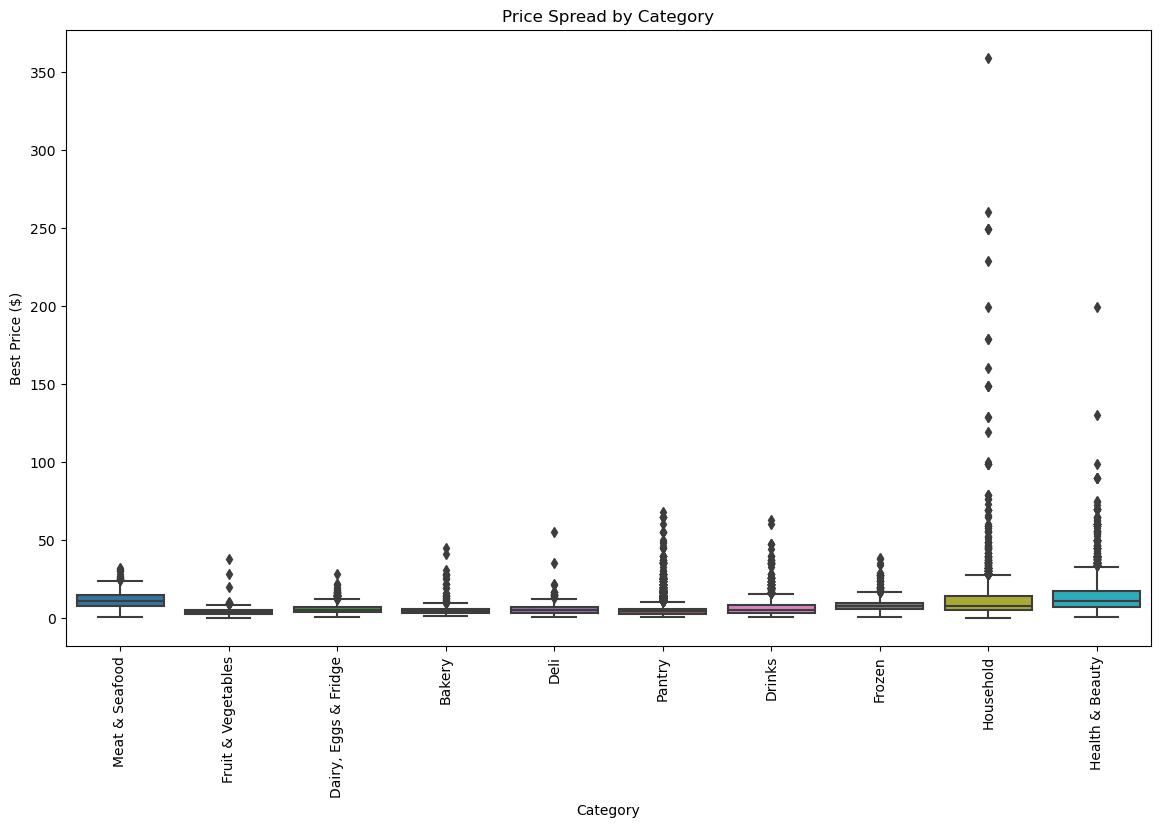


Number of discounted products: 1246

Average Discount Percent per Category:
category
Health & Beauty         33.829802
Household               28.192510
Drinks                  24.223164
Pantry                  22.592807
Fruit & Vegetables      21.390467
Bakery                  20.335362
Frozen                  20.150402
Deli                    16.616271
Dairy, Eggs & Fridge    15.279759
Meat & Seafood          11.933944
Name: discount_percent, dtype: float64


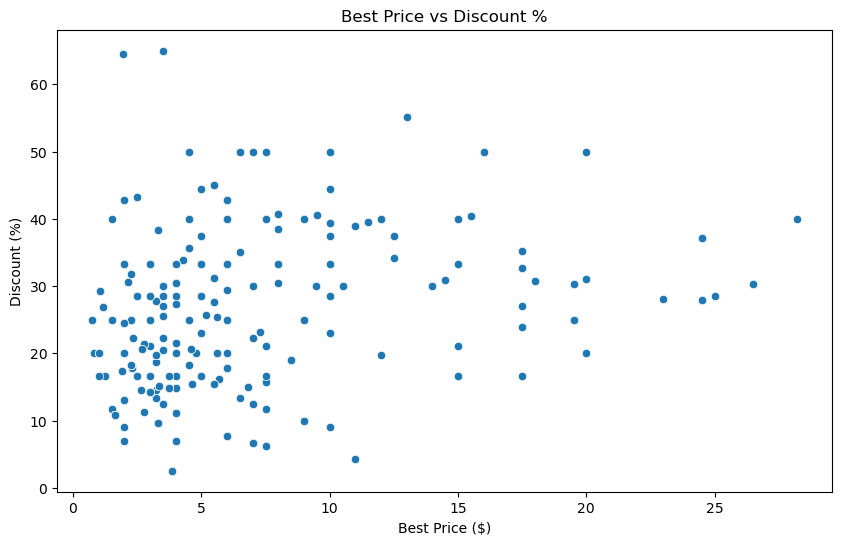

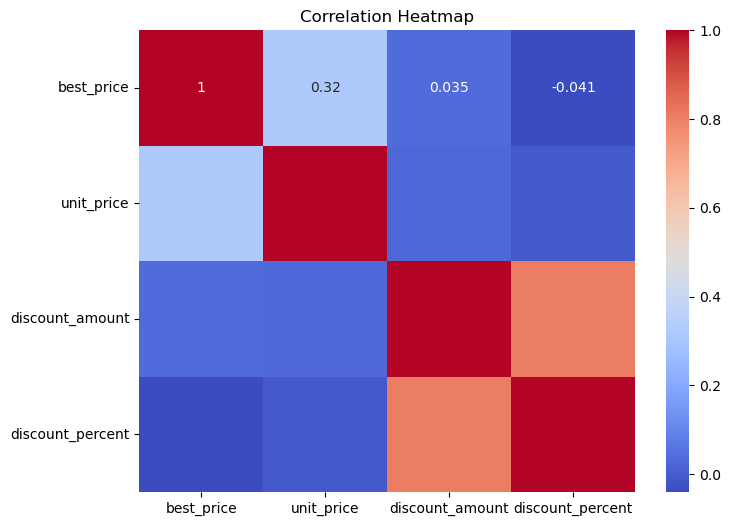

In [1]:
# DiscountMate - Coles Dataset - Full EDA Notebook

# ====================
# 1. Import Libraries
# ====================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ====================
# 2. Load and Clean Data
# ====================

# Load dataset
df = pd.read_csv('Coles_cleaned (1).csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop duplicates
df = df.drop_duplicates()

# Drop rows missing important values
df = df.dropna(subset=['item_name', 'best_price'])

# Remove invalid prices
df = df[df['best_price'] > 0]

# View first few rows
df.head()

# ====================
# 3. Optional: Create Discount Columns
# ====================

# Only if item_price exists and represents original price
if 'item_price' in df.columns:
    df['discount_amount'] = df['item_price'] - df['best_price']
    df['discount_percent'] = ((df['item_price'] - df['best_price']) / df['item_price']) * 100
    df['discount_amount'] = df['discount_amount'].fillna(0)
    df['discount_percent'] = df['discount_percent'].fillna(0)

# ====================
# 4. Basic Data Overview
# ====================

print(f"Total unique products: {df['product_code'].nunique()}")
print(f"Total categories: {df['category'].nunique()}")
print("\nTop 10 Categories by Product Count:")
print(df['category'].value_counts().head(10))

# ====================
# 5. Price Analysis
# ====================

# Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['best_price'], bins=50, kde=True)
plt.title('Distribution of Best Prices')
plt.xlabel('Best Price ($)')
plt.ylabel('Number of Products')
plt.show()

# Top 10 Most Expensive Products
print("\nTop 10 Most Expensive Products:")
print(df[['item_name', 'best_price']].sort_values(by='best_price', ascending=False).head(10))

# Top 10 Cheapest Products
print("\nTop 10 Cheapest Products:")
print(df[['item_name', 'best_price']].sort_values(by='best_price').head(10))

# ====================
# 6. Category-wise Price Analysis
# ====================

# Average price per category
avg_price_category = df.groupby('category')['best_price'].mean().sort_values(ascending=False)
print("\nAverage Best Price per Category:")
print(avg_price_category)

# Boxplot: Price spread by category
plt.figure(figsize=(14,8))
sns.boxplot(x='category', y='best_price', data=df)
plt.xticks(rotation=90)
plt.title('Price Spread by Category')
plt.ylabel('Best Price ($)')
plt.xlabel('Category')
plt.show()

# ====================
# 7. Discount Analysis (Optional)
# ====================

if 'discount_percent' in df.columns:
    discounted = df[df['discount_percent'] > 0]
    print(f"\nNumber of discounted products: {len(discounted)}")
    
    # Average discount percent per category
    avg_discount_category = discounted.groupby('category')['discount_percent'].mean().sort_values(ascending=False)
    print("\nAverage Discount Percent per Category:")
    print(avg_discount_category)
    
    # Scatter Plot: Best Price vs Discount Percent
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='best_price', y='discount_percent', data=discounted)
    plt.title('Best Price vs Discount %')
    plt.xlabel('Best Price ($)')
    plt.ylabel('Discount (%)')
    plt.show()

# ====================
# 8. Correlation Analysis (Optional)
# ====================

if 'discount_percent' in df.columns:
    corr = df[['best_price', 'unit_price', 'discount_amount', 'discount_percent']].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# ====================
# 9. Hypotheses (Ideas for Deeper Analysis)
# ====================

# 1. Some categories have higher average prices than others.
# 2. Discounted products are mostly under $10.
# 3. Top discounted categories have cheaper items.
# 4. Items with highest unit price are niche products (e.g., Vitamins, Health).
# 5. Cheaper items are more frequently discounted.

# ====================
# End of EDA Notebook
# ====================
